# Lending Club - Interest Rate Predictor

## Current Notebook: 3_Model_Prep 

---
**Author:** Rohit Singh
<br/>
[GitHub](https://github.com/rohitsinghxyz) | [LinkedIn](https://www.linkedin.com/in/rohitsinghxyz)
<br/>
<br/>
**Project:** Lending Club - Interest Rate Predictor
<br/>
<br/>
**Previous Notebook:** 2_Exploratory_Data_Analysis 
<br/>
**Current Notebook:** 3_Model_Prep
<br/>
**Next Notebook:** 4_Model_Decision Tree

---
## Table of Contents

[1. Data Import](#1)
<br/>
[2. Final Checks on Data](#2)
<br/>
[3. Train / Validation / Test Sets](#3)
<br/>
[4. Data Export](#4)

---
<a id="1"></a>
## 1. Data Import

In [1]:
# Import packages
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

Let us import the reduced-size `dfa_prep` data frame.

In [2]:
# Load data frame
dfa_prep = joblib.load('data/dfa_prep.pkl')

In [3]:
# Check data frame shape
print(f'There are {dfa_prep.shape[0]} rows and {dfa_prep.shape[1]} columns.')

There are 2080283 rows and 18 columns.


In [4]:
# Check sample
dfa_prep.sample(5)

,int_rate,loan_amnt,term,purpose,annual_inc,verification_status,home_ownership,dti,open_acc,total_acc,mort_acc,num_sats,num_bc_sats,disbursement_method,fico_range_avg,pub_rec_bin,pub_rec_bankruptcies_bin,tax_liens_bin
1384597,25.34,15000.0,36 months,other,120000.0,Not Verified,RENT,31.54,20.0,59.0,0.0,20.0,5.0,Cash,662.0,pub_rec_0_bin,pub_rec_bankruptcies_0_bin,tax_liens_0_bin
511413,14.08,8000.0,36 months,home_improvement,15600.0,Source Verified,RENT,5.00,3.0,9.0,2.0,3.0,3.0,Cash,672.0,pub_rec_0_bin,pub_rec_bankruptcies_0_bin,tax_liens_0_bin
589319,7.21,6225.0,36 months,home_improvement,34000.0,Not Verified,MORTGAGE,29.04,16.0,26.0,1.0,16.0,6.0,Cash,712.0,pub_rec_0_bin,pub_rec_bankruptcies_0_bin,tax_liens_0_bin
2203926,5.32,30000.0,36 months,debt_consolidation,315000.0,Not Verified,MORTGAGE,9.27,12.0,34.0,3.0,12.0,3.0,Cash,717.0,pub_rec_0_bin,pub_rec_bankruptcies_0_bin,tax_liens_0_bin
1395206,14.47,10000.0,60 months,home_improvement,34000.0,Not Verified,OWN,25.59,9.0,28.0,2.0,9.0,3.0,Cash,762.0,pub_rec_0_bin,pub_rec_bankruptcies_0_bin,tax_liens_0_bin


The data frame seems to have loaded correctly.

In [5]:
# Check data types
dfa_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080283 entries, 0 to 2260698
Data columns (total 18 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   int_rate                  float64 
 1   loan_amnt                 float64 
 2   term                      object  
 3   purpose                   object  
 4   annual_inc                float64 
 5   verification_status       object  
 6   home_ownership            object  
 7   dti                       float64 
 8   open_acc                  float64 
 9   total_acc                 float64 
 10  mort_acc                  float64 
 11  num_sats                  float64 
 12  num_bc_sats               float64 
 13  disbursement_method       object  
 14  fico_range_avg            float64 
 15  pub_rec_bin               category
 16  pub_rec_bankruptcies_bin  category
 17  tax_liens_bin             category
dtypes: category(3), float64(10), object(5)
memory usage: 259.9+ MB


In [6]:
# Check for null values
dfa_prep.isna().sum()

int_rate                    0
loan_amnt                   0
term                        0
purpose                     0
annual_inc                  0
verification_status         0
home_ownership              0
dti                         0
open_acc                    0
total_acc                   0
mort_acc                    0
num_sats                    0
num_bc_sats                 0
disbursement_method         0
fico_range_avg              0
pub_rec_bin                 0
pub_rec_bankruptcies_bin    0
tax_liens_bin               0
dtype: int64

There are no null values in our data set.

---
<a id="2"></a>
### 2. Final Checks on Data

Before we split the data into Train, Validation, and Test sets, let us check for multi-collinearity.

In [7]:
# Check columns
dfa_prep.columns

Index(['int_rate', 'loan_amnt', 'term', 'purpose', 'annual_inc',
       'verification_status', 'home_ownership', 'dti', 'open_acc', 'total_acc',
       'mort_acc', 'num_sats', 'num_bc_sats', 'disbursement_method',
       'fico_range_avg', 'pub_rec_bin', 'pub_rec_bankruptcies_bin',
       'tax_liens_bin'],
      dtype='object')

In [8]:
# Check categorical columns
categorical_cols = dfa_prep.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['term', 'purpose', 'verification_status', 'home_ownership',
       'disbursement_method', 'pub_rec_bin', 'pub_rec_bankruptcies_bin',
       'tax_liens_bin'],
      dtype='object')

In [9]:
# Check numerical columns without target column `int_rate`
numerical_cols = dfa_prep.select_dtypes(include=['int64', 'float64']).columns.\
                           difference(['int_rate'])
numerical_cols

Index(['annual_inc', 'dti', 'fico_range_avg', 'loan_amnt', 'mort_acc',
       'num_bc_sats', 'num_sats', 'open_acc', 'total_acc'],
      dtype='object')

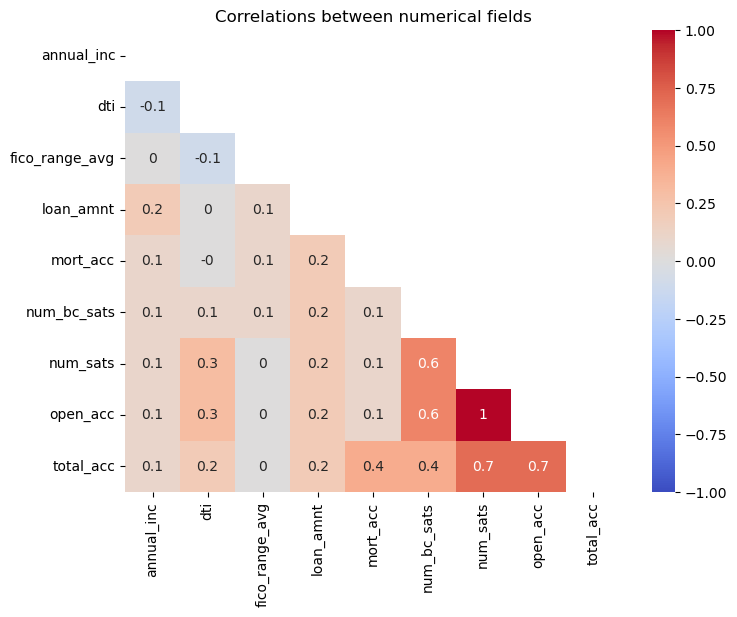

In [10]:
# Check correlation heatmap

# Create plot
plt.figure(figsize=(8,6))
sns.heatmap(dfa_prep[numerical_cols].corr().round(1), vmin=-1, vmax=1, cmap='coolwarm', annot=True,\
            mask=np.triu(dfa_prep[numerical_cols].corr()))

# Set title, label, legend
plt.title('Correlations between numerical fields')

# Show plot
plt.show()

We notice strong correlations between the following columns:
- `open_acc` and `num_sats` (Correlation of 1)
- `open_acc` and `total_acc` (Correlation of 0.7)
- `total_acc` and `num_sats` (Correlation of 0.7)

What are these columns?
- `open_acc` - The number of open credit lines in the borrower's credit file.
- `total_acc` - The total number of credit lines currently in the borrower's credit file. We can drop this column as we would still have `open_acc` column.
- `num_sats` - Number of satisfactory accounts. We can drop this column as we would still have `num_bc_sats` column.

Let us drop both `total_acc` and `num_sats` columns.

In [11]:
# Drop column
dfa_prep.drop(['total_acc'], axis=1, inplace=True)

In [12]:
# Drop column
dfa_prep.drop(['num_sats'], axis=1, inplace=True)

In [13]:
# Check numerical columns without target column `int_rate`
numerical_cols = dfa_prep.select_dtypes(include=['int64', 'float64']).columns.\
                           difference(['int_rate'])
numerical_cols

Index(['annual_inc', 'dti', 'fico_range_avg', 'loan_amnt', 'mort_acc',
       'num_bc_sats', 'open_acc'],
      dtype='object')

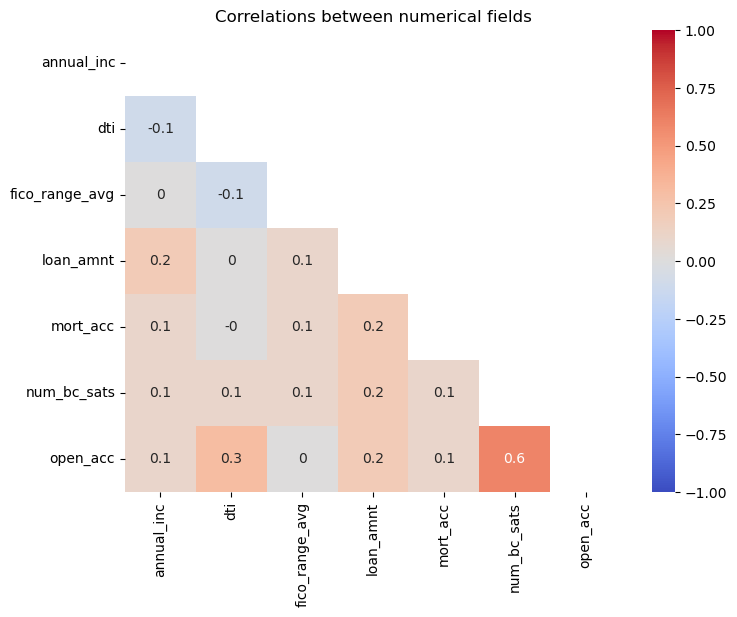

In [14]:
# Check correlation heatmap

# Create plot
plt.figure(figsize=(8,6))
sns.heatmap(dfa_prep[numerical_cols].corr().round(1), vmin=-1, vmax=1, cmap='coolwarm', annot=True,\
            mask=np.triu(dfa_prep[numerical_cols].corr()))

# Set title, label, legend
plt.title('Correlations between numerical fields')

# Show plot
plt.show()

In [15]:
# Check data frame shape
print(f'There are {dfa_prep.shape[0]} rows and {dfa_prep.shape[1]} columns.')

There are 2080283 rows and 16 columns.


In [16]:
# Make a copy of data frame
dfa = dfa_prep.copy(deep=True)

In [17]:
# Check data frame shape
print(f'There are {dfa.shape[0]} rows and {dfa.shape[1]} columns.')

There are 2080283 rows and 16 columns.


The data frame shapes match.

We can now delete the `dfa_prep` data frame.

In [18]:
# Delete data frame
del dfa_prep

In [19]:
# Export data frame
joblib.dump(dfa, 'data/dfa.pkl')

['data/dfa.pkl']

Let's split our data frame in to X and y.

In [20]:
# X represents our columns/features i.e. the independent variables
X = dfa.drop(['int_rate'], axis=1)

# y represents our target column i.e. the dependent variable
y = dfa['int_rate']

In [21]:
# Check shapes
X.shape, y.shape

((2080283, 15), (2080283,))

Let's take a look at the relationship between independent and dependent variables.

In [22]:
# Check numerical columns in X
X_numerical_cols = dfa.select_dtypes(include=['int64', 'float64']).columns.\
                           difference(['int_rate'])
X_numerical_cols

Index(['annual_inc', 'dti', 'fico_range_avg', 'loan_amnt', 'mort_acc',
       'num_bc_sats', 'open_acc'],
      dtype='object')

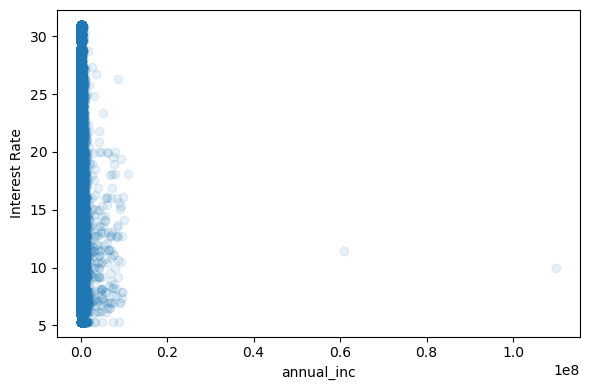

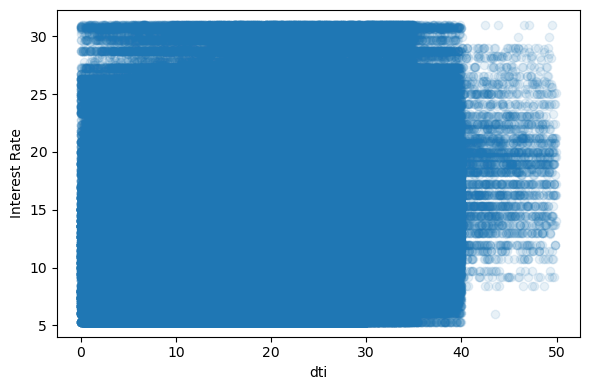

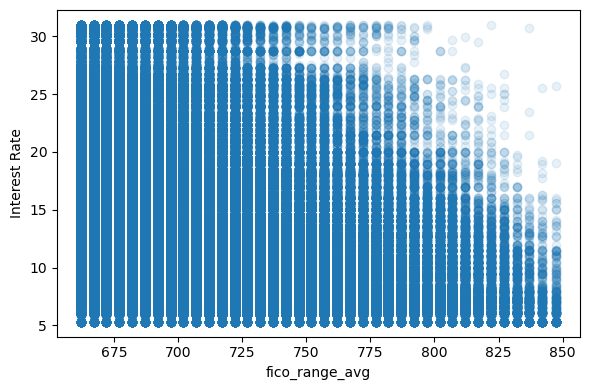

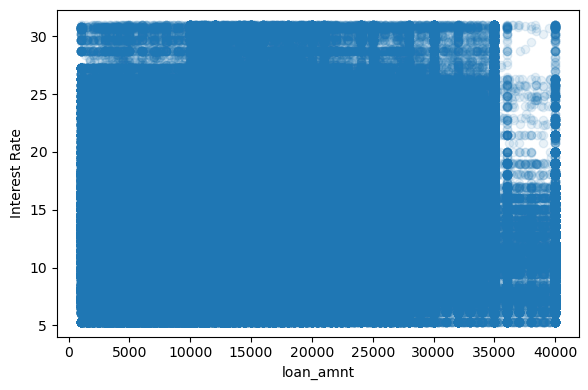

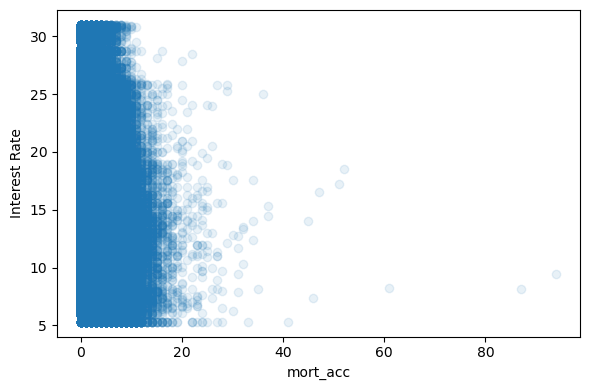

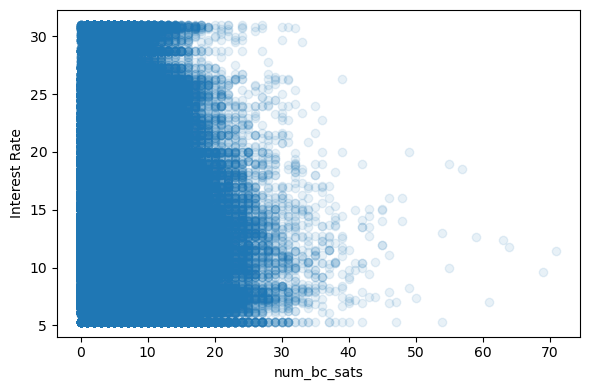

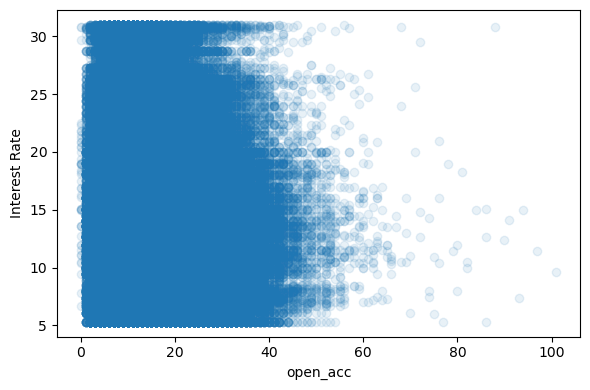

In [23]:
# Create pairplots

for col in dfa[X_numerical_cols].columns:
    
    # Set plot size
    plt.figure(figsize=(6,4))
    
    # Create scatterplot for each independent-dependent variable combination
    plt.scatter(dfa[X_numerical_cols][col], y, alpha=0.1)
    
    # Set X and Y axes labels
    plt.ylabel('Interest Rate')
    plt.xlabel(col)
    
    # Make sure the plot fit
    plt.tight_layout()
    
    # Show the plots
    plt.show();

As you can see from the plots above, there is no clear linear relationship between the independent and dependent variables. Hence, We will focus on models that can better handle non-linear data.

For now, we start by splitting our data frame in to Remainder (Train + Validation) and Test sets.

---
<a id="3"></a>
### 3. Train / Validation / Test Sets

We will first split our data frame in to Remainder and Test sets:
- Remainder Set: 80%
- Test Set: 20%

In [24]:
# Take a chunk for our 20% Test set
X_remainder, X_test, y_remainder, y_test = train_test_split\
                                    (X, y, test_size = 0.2, random_state=123)

X_remainder and y_remainder contain the other 80% of data frame.

Now, we will split our Remainder set in to Train and Validation sets:
- Train Set: 80%
- Validation Set: 20%

In [25]:
# Split the Remainder set in two chunks (Train, Validation)
X_train, X_validation, y_train, y_validation = train_test_split\
                                (X_remainder, y_remainder, test_size = 0.2, random_state=123)

Our final proportions end up being:

- Test Set: 0.2
- Validation Set: 0.8 * 0.2 = 0.16
- Train Set: 0.8 * 0.8 = 0.64

We can check the sizes of each chunk. Originally, in the data set we have 2,026,987 data points. When rounded, we should expect:

- Test Set: 0.2 * 2,080,283 ≈ 416,057
- Validation Set: 0.16 * 2,080,283 ≈ 332,846
- Train Set: 0.64 * 2,080,283 ≈ 1,331,380

Let's check if we got the set sizes we expected.

In [26]:
# Print shapes of split sets
print(f'Shape of Test set: {X_test.shape}')
print(f'Shape of Val set: {X_validation.shape}')
print(f'Shape of Train set: {X_train.shape}')

Shape of Test set: (416057, 15)
Shape of Val set: (332846, 15)
Shape of Train set: (1331380, 15)


The numbers match. This is exactly what we expected.

Let us export these different sets as 'pkl' files for easy loading in other notebooks for machine learning models.

---
<a id="4"></a>
### 4. Data Export

In [27]:
# Export split sets

joblib.dump(X_remainder, 'data/X_remainder.pkl')
joblib.dump(X_train, 'data/X_train.pkl')
joblib.dump(X_test, 'data/X_test.pkl')
joblib.dump(X_validation, 'data/X_validation.pkl')

joblib.dump(y_remainder, 'data/y_remainder.pkl')
joblib.dump(y_train, 'data/y_train.pkl')
joblib.dump(y_test, 'data/y_test.pkl')
joblib.dump(y_validation, 'data/y_validation.pkl')

['data/y_validation.pkl']

In the next Jupyter notebook (4_Model_Decision Tree), we will try to fit our data on Decision Tree machine learning model.

**THE END**